# Environmental Spatial Data Analysis

# Lecture 7

# Expectation (Discrete random variable)

$$E[X] = \sum_{i=1}^nx_ip(x_i) = \mu$$

Think of expectation as the population mean ($\mu = E[X]$). 

$p_i$ is the probability mass function. 


# Expectation (Dice example)

The population of potential rolls is $x_i \in \{1,2,3,4,5,6\}$.

Thus the expected value (or population mean) is $\mu = \left(\frac{1+2+3+4+5+6}{6} = 21/6\right)$


# Sample mean vs population mean (i.e., expected value)

$$\hat{\mu} = \frac{1}{n}\sum_{i=1}^nx_i$$
Assume we roll the dice 3 times and we get 1,3,4. Then our sample mean would be $\hat{\mu} = 16/6$. 

Thus clearly $\hat{\mu} \neq \mu$ ($21/6 \neq 16/6$) and thus it is only an approximation.

# Arithmetic mean: Unbiased mean estimate

To ensure we have an unbiased estimator, then we want:

$$E[\hat{\mu}] = \mu$$

Naive example with 2 samples that cover the population:

$$\hat{\mu}_1 = \frac{1+3+4}{3} = 8/3$$
$$\hat{\mu}_2 = \frac{2+5+6}{3} = 13/3$$
$$\mu = E[\hat{\mu}] = 8/6 + 13/6 = 3.5$$

# Expectation (Continuous random variable)

$$E[X] = \int_{-\infty}^{\infty}xf(x)dx = \mu$$

Where $f(x)$ is our probability density function for $X$.


# Expectation: Measure of central tendency

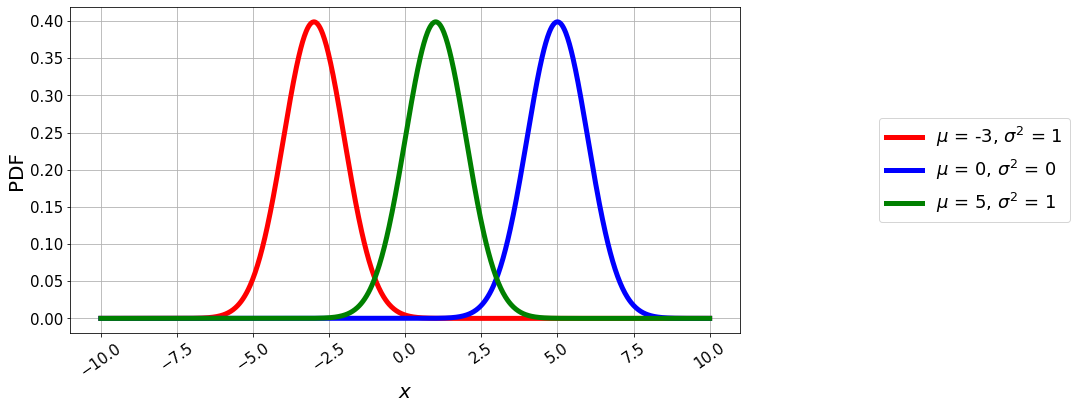

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
x = np.linspace(-10,10,1000)
plt.figure(figsize=(12,6))
#Plot the pdf
plt.plot(x,scipy.stats.norm.pdf(x,-3,1),'r-', lw=5)
plt.plot(x,scipy.stats.norm.pdf(x,5,1),'b-', lw=5)
plt.plot(x,scipy.stats.norm.pdf(x,1,1),'g-', lw=5)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel('PDF',fontsize=20)
plt.xticks(fontsize=15,rotation=35)
plt.yticks(fontsize=15)
plt.grid('on')
plt.legend([r'$\mu$ = -3, $\sigma^2$ = 1',r'$\mu$ = 0, $\sigma^2$ = 0',r'$\mu$ = 5, $\sigma^2$ = 1'],
           fontsize=18, bbox_to_anchor=(1.1, 0.25, 0.5, 0.5),loc=10)
plt.grid('on')
plt.show()

# Central tendency: Other measures


**Geometric mean**

$$\bar{x}_G = \left(\prod_{i=1}^n{x_i}\right)^{1/n}$$

**Harmonic mean**

$$\bar{x}_H = \left(\frac{\sum_i^n x_i^{-1}}{n}\right)^{-1}$$

**Median**

$$\text{~50th percentile}$$

# Variance: Measure of spread

$$\sigma^2 = \text{Var}[X] = E[\left(X - \mu_X\right)^2] = E[X^2] - E[X]^2$$



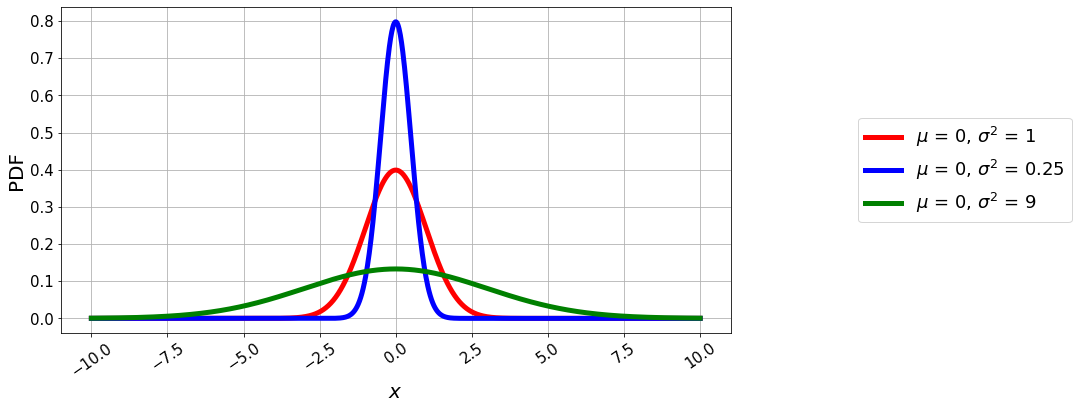

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
x = np.linspace(-10,10,1000)
plt.figure(figsize=(12,6))
#Plot the pdf
plt.plot(x,scipy.stats.norm.pdf(x,0,1),'r-', lw=5)
plt.plot(x,scipy.stats.norm.pdf(x,0,0.5),'b-', lw=5)
plt.plot(x,scipy.stats.norm.pdf(x,0,3),'g-', lw=5)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel('PDF',fontsize=20)
plt.xticks(fontsize=15,rotation=35)
plt.yticks(fontsize=15)
plt.grid('on')
plt.legend([r'$\mu$ = 0, $\sigma^2$ = 1',r'$\mu$ = 0, $\sigma^2$ = 0.25',r'$\mu$ = 0, $\sigma^2$ = 9'],
           fontsize=18, bbox_to_anchor=(1.1, 0.25, 0.5, 0.5),loc=10)
plt.grid('on')
plt.show()

# Variance: Discrete vs. Continuous

Discrete: $$\text{Var}[X] = \sum_{i=1}^np(x_i)(x_i-\mu)^2$$

Continuous: $$\text{Var}[X] = \int_{-\infty}^{\infty}f(x)(x-\mu)^2dx$$


# Standard deviation

$$\sigma = \sqrt{\text{Var}[X]}$$

# Coefficient of variation

$$C_v = \frac{\sigma}{\mu}$$

# Sample variance

Sample variance: $$s^2 = \frac{1}{n}\sum_{i=1}^n(x_i-\hat{\mu})^2 \approx \sigma^2$$

Unbiased sample variance: $$s_{ub}^2 = \frac{1}{n-1}\sum_{i=1}^n(x_i-\hat{\mu})^2$$

# Other measures of spread

**Median absolute deviation**

$$m = \frac{1}{n-1}\sum_{i=1}^n\left|x_i - 50^{\text{th}\,\text{pct}}\right|$$

**Interquartile range**

$$\text{IQR} = 75^{\text{th}\,\text{pct}} - 25^{\text{th}\,\text{pct}}$$

# Let's move now towards the bivariate problem

# Covariance

Measure of the joint variability of random variables $X$ and $Y$.

$$\text{Cov}(X,Y) = E[\left(X - \mu_X\right)\left(Y - \mu_Y\right)] = E[XY] - \mu_X\mu_Y$$

Note that the variance is simply the covariance of $X$ with itself.

$$\text{Var}(X,Y) = \text{Var}(X,X) = E[\left(X - \mu_X\right)^2] = E[X^2] - E[X]^2$$

# Independence

If two random variables are independent, then:

$$\text{Cov}(X,Y) = 0$$

However, the converse is not always true.

# Sample covariance 

The sample covariance is given by:

$$\text{Cov}(X,Y) = \frac{1}{n}\sum_{i=1}^n(x_i - \hat{\mu}_X
)(y_i - \hat{\mu}_Y)$$

# Let's look at an example...

In [16]:
import netCDF4 as nc    
import datetime
sites = {'seattle':{'lat':47.6062,'lon':-122.3321},
         'paris':{'lat':48.8566,'lon':2.3522},
         'santiago':{'lat':-33.4489,'lon':-70.6693}}
file = '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc'
fp = nc.Dataset(file)
lats = fp['lat'][:]
lons = fp['lon'][:]
times = fp['time']
for site in sites:
    lat = sites[site]['lat']
    lon = sites[site]['lon']
    if lon < 0:lon = 360 + lon
    sites[site]['ilat'] = int(np.argmin(np.abs(lats - lat)))
    sites[site]['ilon'] = int(np.argmin(np.abs(lons - lon)))
var = 't2m'
#Iterate through all the sites
for site in sites:
    #Extract the data for the given site
    ilat = sites[site]['ilat']
    ilon = sites[site]['ilon']
    sites[site][var] = fp[var][:,ilat,ilon]
#Convert the dates to a datetime array
dates = nc.num2date(times[:],units=times.units,calendar=times.calendar)

# Going back to our three city example

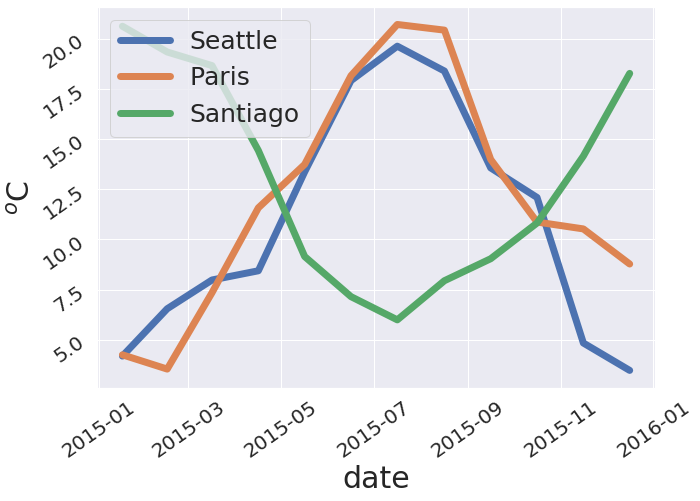

In [17]:
#Calculate the Boolean mask for dates within 2015
m = (dates >= datetime.datetime(2015,1,1)) & (dates <= datetime.datetime(2015,12,31))
#Assemble the subsetted dates array
dates_subset = dates[m]

plt.figure(figsize=(10,7))
plt.plot(dates_subset,sites['seattle']['t2m'][m],lw=7)
plt.plot(dates_subset,sites['paris']['t2m'][m],lw=7)
plt.plot(dates_subset,sites['santiago']['t2m'][m],lw=7)
plt.xticks(fontsize=20,rotation=35)
plt.yticks(fontsize=20,rotation=35)
plt.xlabel('date',fontsize=30)
plt.ylabel(r'$^o$C',fontsize=30)
plt.grid('on')
plt.legend(['Seattle','Paris','Santiago'],fontsize=25)
plt.show()

# Covariance between each time series

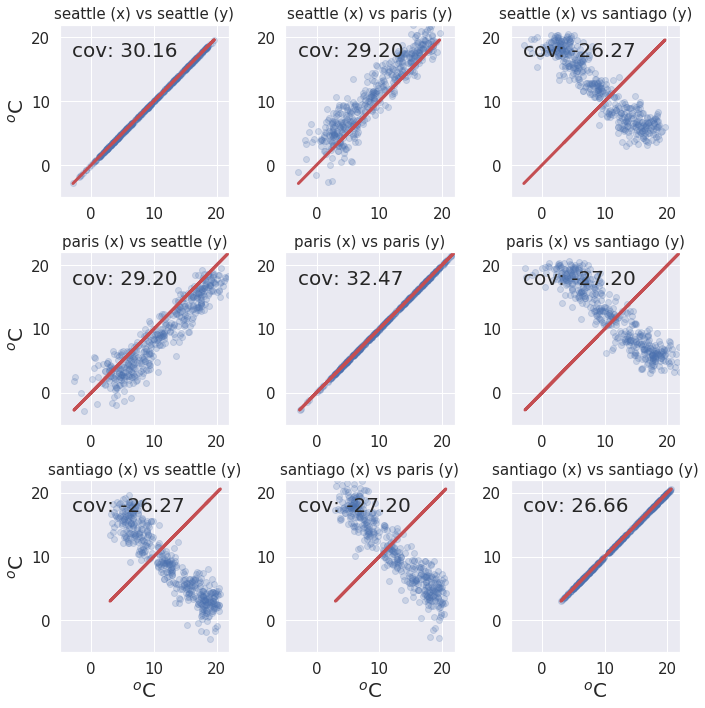

In [30]:
fig = plt.figure(figsize=(10,10))
i = 0
for site1 in sites:
    for site2 in sites:
        i = i + 1
        plt.subplot(3,3,i)
        plt.plot(sites[site1]['t2m'],sites[site2]['t2m'],'bo',alpha=0.2)
        plt.plot(sites[site1]['t2m'],sites[site1]['t2m'],'r',lw=3)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlim([-5,22])
        plt.ylim([-5,22])
        plt.title('%s (x) vs %s (y)' % (site1,site2),fontsize=15)
        if i in [7,8,9]:plt.xlabel(r'$^o$C',fontsize=20)
        if i in [1,4,7]:plt.ylabel(r'$^o$C',fontsize=20)
        plt.text(-3,17,'cov: %.2f' % np.cov(sites[site1]['t2m'],sites[site2]['t2m'])[0,1],fontsize=20)
fig.tight_layout()
plt.show()

* Anyone can guess what is the variance of the temperature time series of Santiago?
* How is it possible that the covariance of Seattle vs Paris is higher than Santiago vs. Santiago?

# Pearson correlation coefficient

The Pearson correlation coefficient is simply a normalized covariance. 

$$\rho = \frac{\text{cov}(X,Y)}{\sqrt{\text{var}(X)}\sqrt{\text{var}(Y)}} = \frac{\text{cov}(X,Y)}{\sigma_X\sigma_Y}$$

Where $\sigma_X$ and $\sigma_Y$ are the standard deviation of $X$ and $Y$ respectively.



# Sample correlation coefficient 

The sample correlation coefficient can then be calculated as:

$$r = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{{\sum_{i=1}^n(x_i - \bar{x})^2}}\sqrt{{\sum_{i=1}^n(y_i - \bar{y})^2}}} \approx \rho$$


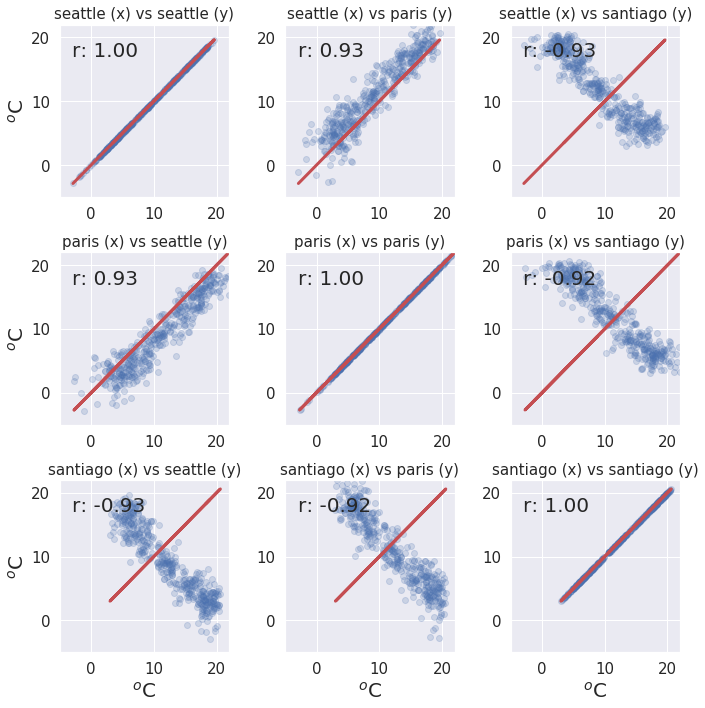

In [35]:
fig = plt.figure(figsize=(10,10))
i = 0
for site1 in sites:
    for site2 in sites:
        i = i + 1
        plt.subplot(3,3,i)
        plt.plot(sites[site1]['t2m'],sites[site2]['t2m'],'bo',alpha=0.2)
        plt.plot(sites[site1]['t2m'],sites[site1]['t2m'],'r',lw=3)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlim([-5,22])
        plt.ylim([-5,22])
        plt.title('%s (x) vs %s (y)' % (site1,site2),fontsize=15)
        if i in [7,8,9]:plt.xlabel(r'$^o$C',fontsize=20)
        if i in [1,4,7]:plt.ylabel(r'$^o$C',fontsize=20)
        #plt.text(-3,17,'cov: %.2f' % np.cov(sites[site1]['t2m'],sites[site2]['t2m'])[0,1]/(np.std(sites[site1]['t2m'])*np.std(sites[site2]['t2m'])),fontsize=20)
        plt.text(-3,17,'r: %.2f' % np.corrcoef(sites[site1]['t2m'],sites[site2]['t2m'])[0,1],fontsize=20)
fig.tight_layout()
plt.show()

# Properties of expectation


* $E[X+Y] = E[X] + E[Y]$
* $E[aX + b] = aE[X] + b$
* $E[XY] = E[X]E[Y]$ if and only if X and Y are independent.


# Properties of variance

* $\text{Var}(X) \geq 0$
* $\text{Var}(a) = 0$
* $\text{Var}(a + X) = \text{Var}(X)$
* $\text{Var}(aX) = a^2\text{Var}(X)$
* $\text{Var}(aX + bY) = a^2\text{Var}(X) + b^2\text{Var}(Y) + 2ab\text{Cov}(X,Y)$
* $\text{Var}(aX + bY) = a^2\text{Var}(X) + b^2\text{Var}(Y)$

# Properties of covariance

* $\text{Cov}(X,a) = 0$
* $\text{Cov}(X,X) = \text{Var}(X)$
* $\text{Cov}(X,Y) = \text{Cov}(Y,X)$
* $\text{Cov}(aX,bY) = ab\text{Cov}(X,Y)$
* $\text{Cov}(a + X,b + Y) = \text{Cov}(X,Y)$


# We are now ready to go to n-dimensions

# Covariance matrix

$$\mathbf{\Sigma} = \begin{bmatrix}
\sigma^2_{X_1}&\cdots&\text{cov}(X_1,X_n)\\
\vdots&\ddots&\vdots\\
\text{cov}(X_n,X_1)&\cdots&\sigma^2_{X_n}\\
\end{bmatrix}$$

This is the population covariance matrix. We estimate the sample covariance matrix $\mathbf{Q}$ from data.


# Covariance matrix example

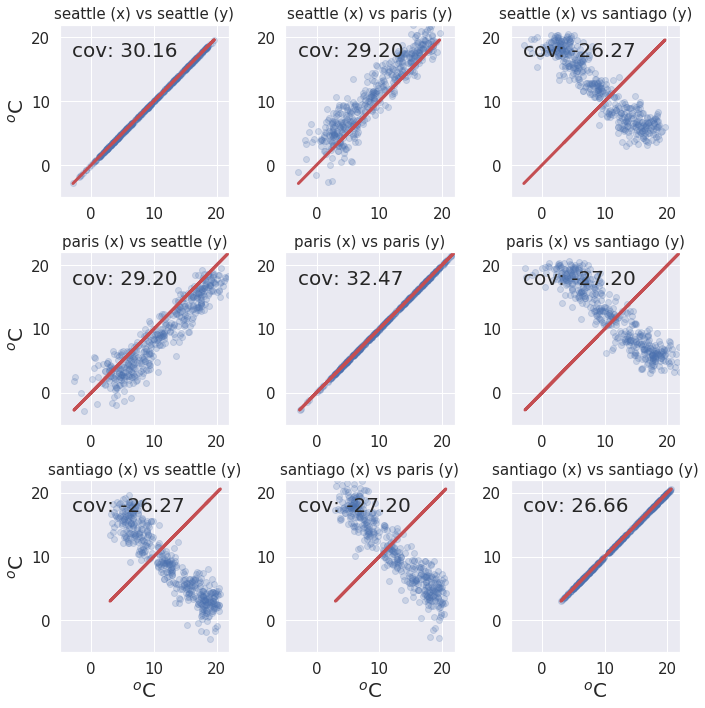

# Correlation matrix

$$\mathbf{\rho} = \begin{bmatrix}
1&\cdots&\frac{\text{cov}(X_1,X_n)}{\sigma_{X_1}\sigma_{X_n}}\\
\vdots&\ddots&\vdots\\
\frac{\text{cov}(X_n,X_1)}{\sigma_{X_n}\sigma_{X_1}}&\cdots&1\\
\end{bmatrix}$$


# Correlation matrix example

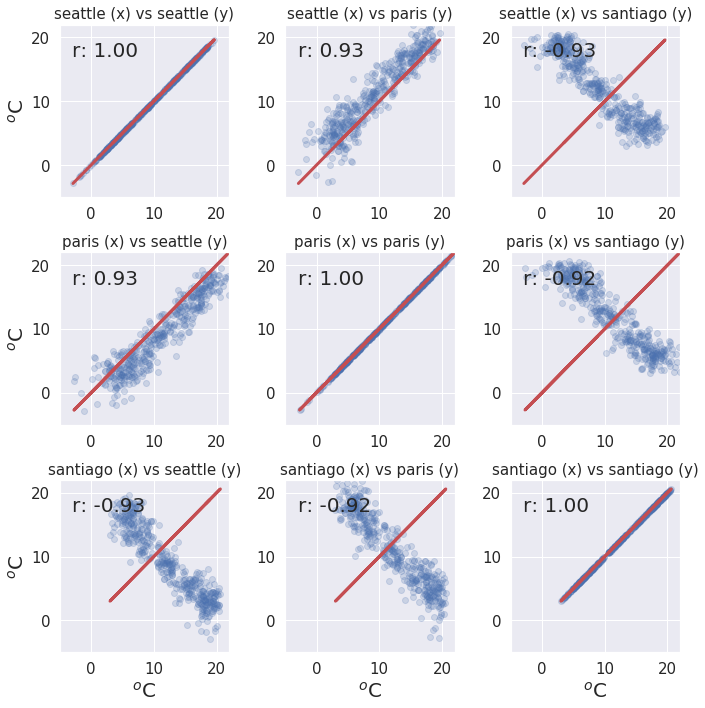

# Example: Increasing dimensions of Gaussians



# Univariate Gaussian Distribution

### Probabilitiy density function

$$f_X = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

Where $\mu$ is the population mean and $\sigma^2$ is the variance

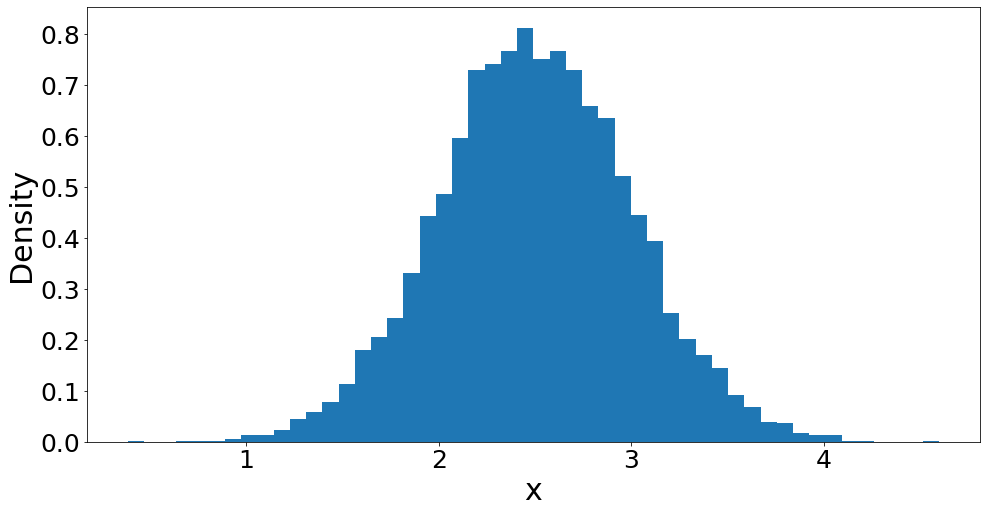

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
mu = 2.5 #mean
var = 0.5 #variance
X = np.random.normal(mu,var,10000)
plt.figure(figsize=(16,8))
plt.hist(X,bins=50,density=True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('x',fontsize=30)
plt.ylabel('Density',fontsize=30)
plt.show()

# Bivariate Gaussian Distribution

### Probabilitiy density function

$$f_{X,Y} = \frac{1}{2\pi\sqrt{\sigma_X^2\sigma_Y^2(1-\rho^2)}}\exp\left({-\frac{1}{2(1-\rho^2)}\left[\frac{(x-\mu_X)^2}{\sigma^2_X} + \frac{(y-\mu_Y)^2}{\sigma^2_Y} - \frac{2\rho(x-\mu_X)(y-\mu_Y)}{\sigma_X\sigma_Y}\right]}\right)$$

Where $\mu_X$ and $\mu_Y$ are the means or expectations of $X$ and $Y$, $\sigma^2_X$ and $\sigma^2_Y$ are the variances of $X$ and $Y$, and $\rho$ is the linear correlation (Pearson correlation) between $X$ and $Y$.

Let's place $x$ and $y$ into a single vector $\mathbf{x}$,

$$\mathbf{x} = \begin{bmatrix}
x\\
y\\
\end{bmatrix}$$

All the means into a single vector $\mu$,

$$\mathbf{\mu} = \begin{bmatrix}
\mu_X\\
\mu_Y\\
\end{bmatrix}$$


And all the variances and the covariance into a single covariance matrix $\mathbf{\Sigma}$:

$$\mathbf{\Sigma} = \begin{bmatrix}
\sigma^2_X&\text{cov}(X,Y)\\
\text{cov}(Y,X)&\sigma^2_Y\\
\end{bmatrix}$$

We can the define the bivariate distribution as:

$$f(X,Y) = \frac{\exp\left(-\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T\mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu})\right)}{\sqrt{(2\pi)^2|\mathbf{\Sigma}|}}$$

Where $|\mathbf{\Sigma}|$ is the determinant of $\mathbf{\Sigma}$.

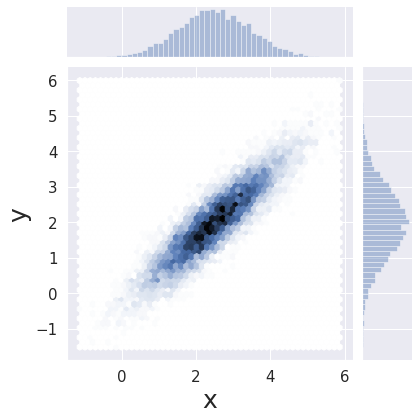

In [12]:
import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')
sns.set(rc={'axes.labelsize':25,
            'figure.figsize':(15.0, 15.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15})
mu = np.array([2.5,2.0])
cov = np.array([[1.0,0.9],[0.9,1.0]])
X = np.random.multivariate_normal(mu,cov, 10000)
df = pd.DataFrame(data={'x':X[:,0],'y':X[:,1]})
sns.jointplot(x='x', y='y',data=df,kind='hex')
plt.show()

# Multivariate Gaussian Distribution

From our bivariate example, we can define the n-dimensional Gaussian distribution:

$$f(\mathbf{x}) = \frac{\exp\left(-\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T\mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu})\right)}{\sqrt{(2\pi)^{n}|\mathbf{\Sigma}|}}$$

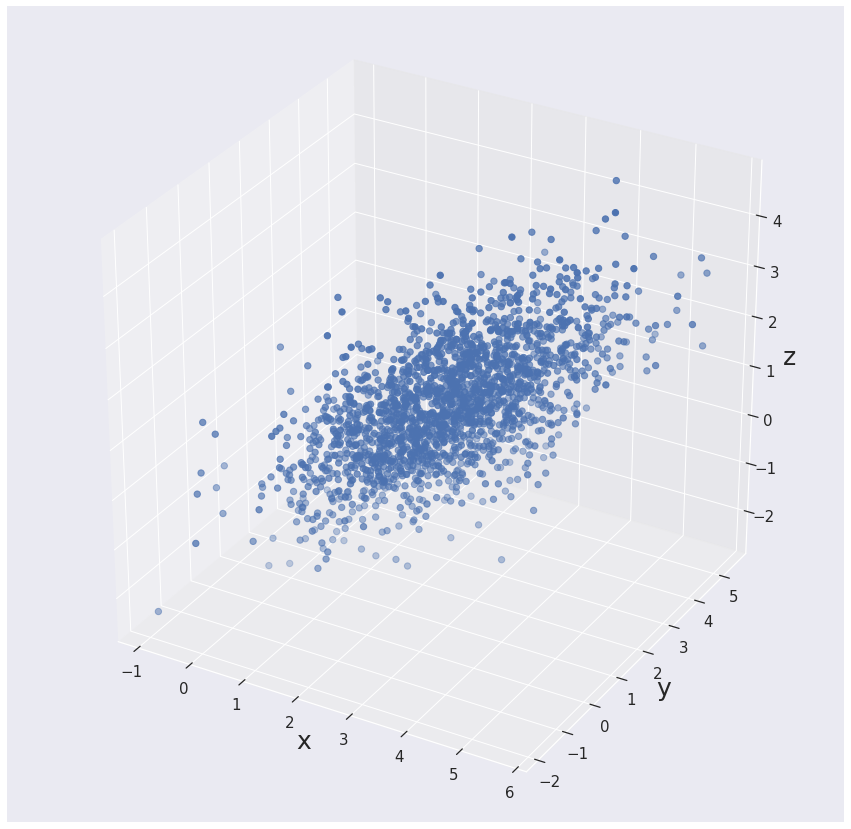

In [13]:
from mpl_toolkits.mplot3d import Axes3D
mu = np.array([2.5,2.0,1.0])
cov = np.array([[1.0,0.9,0.5],
                [0.9,1.0,0.7],
                [0.5,0.7,1.0]])
X = np.random.multivariate_normal(mu,cov, 2000)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],s=40)
ax.set_xlabel('x',fontsize=25)
ax.set_ylabel('y',fontsize=25)
ax.set_zlabel('z',fontsize=25)
plt.show()

* We will wrap up this module with an introduction into Bayesian statistics on Thursday

* Then we are off to look at map projections